## Problem 1

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

Time to maturity:  0.038356164383561646


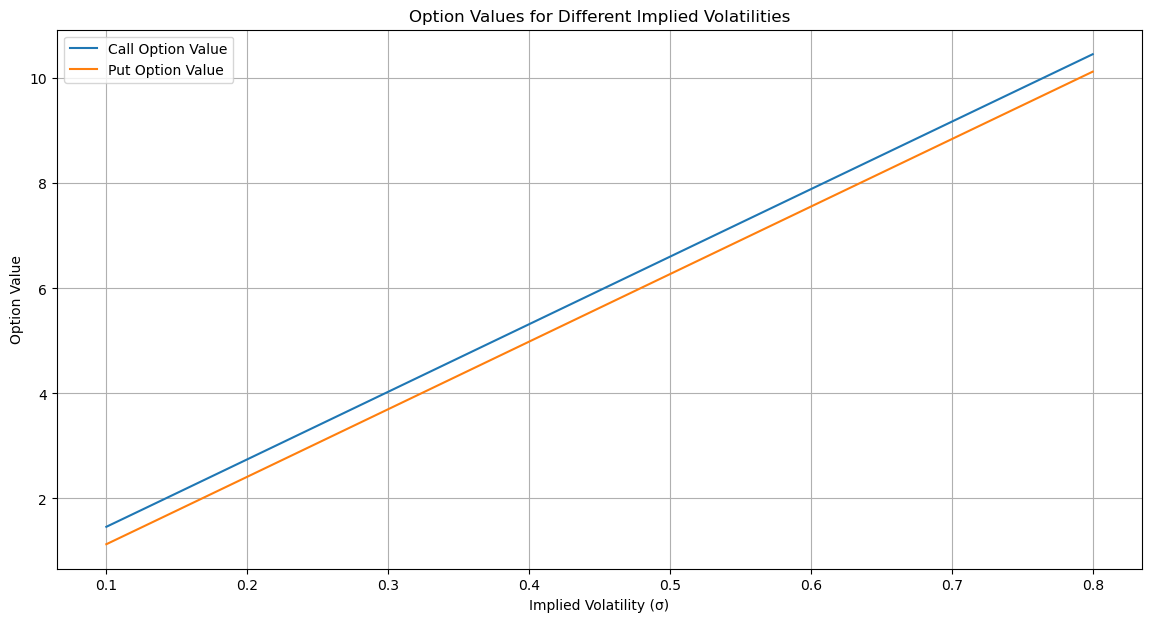

In [10]:
# Function to calculate time to maturity using calendar days
def calculate_ttm(curr_date, expire_date):
    days_to_expiration = (expire_date - curr_date).days
    return days_to_expiration / 365

# Function to calculate d1 and d2
def calculate_d1_d2(S0, X, r, T, sigma):
    d1 = (np.log(S0 / X) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return d1, d2

# Function to calculate both call and put option values using Black-Scholes
def BS_option_values(S0, X, r, T, sigma):
    d1, d2 = calculate_d1_d2(S0, X, r, T, sigma)
    call_value = S0 * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)
    put_value = X * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    return call_value, put_value

# Given dates
current_date = datetime.strptime('03/03/2023', '%m/%d/%Y')
expiration_date = datetime.strptime('03/17/2023', '%m/%d/%Y')

# Given data
S0 = 165  # Current stock price
X = S0    # We'll assume that the strike price is the same as the current stock price for simplicity
r = 0.0525  # Risk-free rate

# Calculate time to maturity
T = calculate_ttm(current_date, expiration_date)
print("Time to maturity: ", T)

# Range of implied volatilities from 10% to 80%
sigma_range = np.linspace(0.1, 0.8, 100)

# Calculate option values for the range of volatilities using the new function
option_values = [BS_option_values(S0, X, r, T, sigma) for sigma in sigma_range]
call_values, put_values = zip(*option_values)  # This unzips the list of tuples into two lists

# Plotting the results with the new functions
plt.figure(figsize=(14, 7))
plt.plot(sigma_range, call_values, label='Call Option Value')
plt.plot(sigma_range, put_values, label='Put Option Value')
plt.title('Option Values for Different Implied Volatilities')
plt.xlabel('Implied Volatility (σ)')
plt.ylabel('Option Value')
plt.legend()
plt.grid(True)
plt.show()

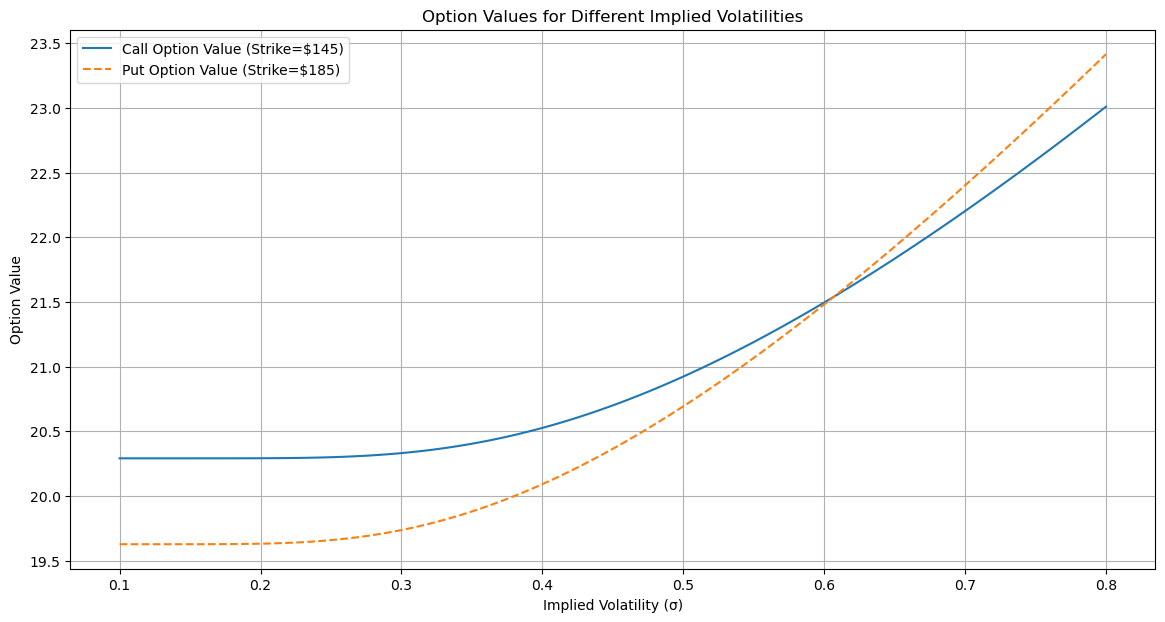

In [8]:
# Let's take a strike price below and above the current stock price for call and put respectively to illustrate
call_strike = 145  # Below the current stock price, to represent an ITM call option
put_strike = 185   # Above the current stock price, to represent an OTM put option

# Calculate option values for the selected strike prices and volatility range
call_values = [BS_option_values(S0, call_strike, r, T, sigma)[0] for sigma in sigma_range]
put_values = [BS_option_values(S0, put_strike, r, T, sigma)[1] for sigma in sigma_range]

# Plotting the results for the selected strike prices
plt.figure(figsize=(14, 7))

plt.plot(sigma_range, call_values, label=f'Call Option Value (Strike=${call_strike})')
plt.plot(sigma_range, put_values, label=f'Put Option Value (Strike=${put_strike})', linestyle='--')

plt.title('Option Values for Different Implied Volatilities')
plt.xlabel('Implied Volatility (σ)')
plt.ylabel('Option Value')
plt.legend()
plt.grid(True)
plt.show()